In [62]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [35]:
stock_symbol = "AMZN"
end_date = datetime.now()
start_date = end_date - timedelta(days=20*365)
df = yf.download(stock_symbol, start=start_date, end=end_date)
df = df[['Adj Close']]
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2003-08-04,1.982500
2003-08-05,1.933500
2003-08-06,1.947000
2003-08-07,1.950500
2003-08-08,1.957500
...,...
2023-07-24,128.800003
2023-07-25,129.130005
2023-07-26,128.149994


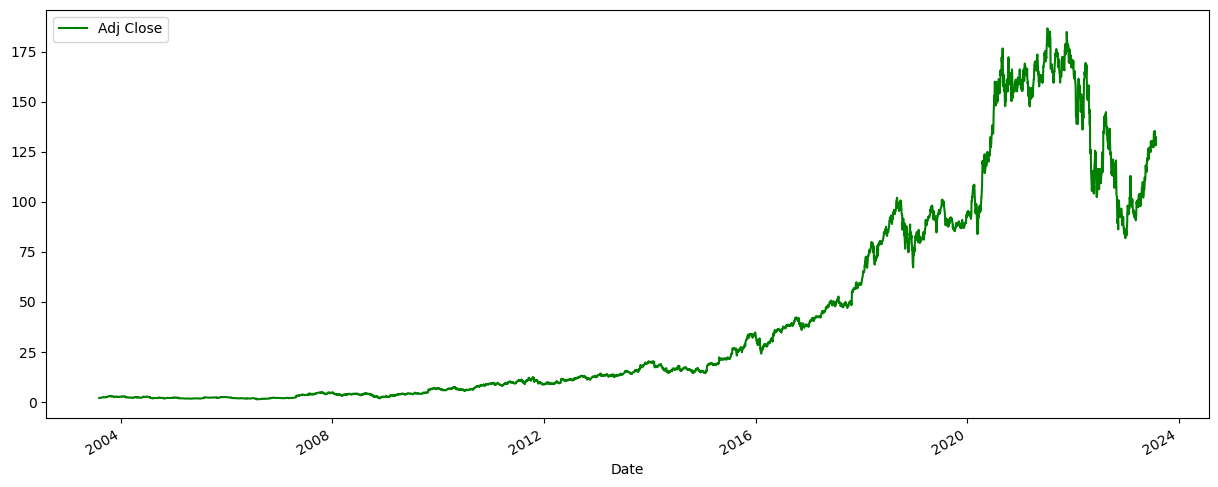

In [36]:
df['Adj Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [48]:
forecast = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast)
df

/var/folders/s_/zvr3ckdn2hl8kzbn9l9wthnm0000gn/T/ipykernel_916/3776047978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-forecast)


,Adj Close,Prediction
Date,,
2003-08-04,1.982500,2.3120
2003-08-05,1.933500,2.3080
2003-08-06,1.947000,2.3945
2003-08-07,1.950500,2.3790
2003-08-08,1.957500,2.3735
...,...,...
2023-07-24,128.800003,NaN
2023-07-25,129.130005,NaN
2023-07-26,128.149994,NaN


In [59]:
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)
X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

/var/folders/s_/zvr3ckdn2hl8kzbn9l9wthnm0000gn/T/ipykernel_916/2547427187.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
confidence

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[127.52366991 125.90915311 126.19817197 125.25139207 130.55336862
 129.73615336 127.74292612 129.58665219 129.44712689 128.31099558
 130.76266417 130.62313887 130.7826007  128.76943693 130.18462645
 127.54359883 129.18801283 131.2011766  134.68932426 135.0680271
 133.95182471 133.22430103 135.74573227 130.3640248  130.40388266
 129.20794936 129.53683368 128.56014138 128.65980882 132.60640545]


(19202.516617368008, 19963.45)

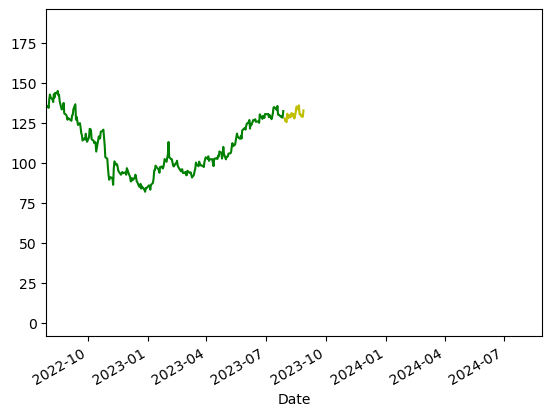

In [101]:
dates = pd.date_range(str(end_date + timedelta(days=1))[:10], str(end_date + timedelta(days=30))[:10])
plt.plot(dates, forecast_predicted, color='y')
df['Adj Close'].plot(color='g')
plt.xlim(xmin=(datetime.now() - timedelta(days=365)))